## HSV

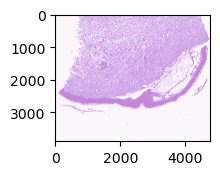

In [7]:
rgb_img = cv2.imread('./kmeans_seg/6107710_RL_K3.png')
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(2,2))
plt.imshow(rgb_img)
plt.show()

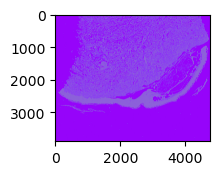

In [8]:
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
plt.figure(figsize=(2,2))
plt.imshow(hsv_img)
plt.show()

In [9]:
def get_split_hsv(hsv_img):

    split_hsv = {"H":[], "S":[], "V":[]}

    for i in range(len(split_hsv)):
        channel_name = list(split_hsv.keys())[i]

        split_array = np.array(hsv_img[:,:,i])
        min_value = np.min(split_array)
        max_value = np.max(split_array)

        split_hsv[channel_name].append((min_value, max_value))

        print("{0} : {1} ~ {2}".format(channel_name,
                                       min_value,
                                       max_value))
    return split_hsv

In [10]:
def get_mask(rgb_img, hsv_img, split_hsv, mode):
    
    min_h, max_h = split_hsv['H'][0]
    min_s, max_s = split_hsv['S'][0]
    min_v, max_v = split_hsv['V'][0]
    
    if mode == "epidermis":
        lower = (int(min_h)+1, int(min_s), int(min_v))
        upper = (int(max_h)-1, int(max_s), int(max_v))
    
    elif mode == "dermis":
        lower = (int(min_h), int(min_s), int(min_v))
        upper = (int(min_h), int(max_s), int(max_v))
    
    elif mode == "background":
        lower = (int(max_h), int(min_s), int(min_v))
        upper = (int(max_h), int(max_s), int(max_v))
        
    else:
        print("Please choose one of the following mode type: epidermis, dermis, background.")
    
    mask = cv2.inRange(hsv_img, lower, upper)
    result = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
    display_mask_result_raw(mode, mask, result, rgb_img, fontsize=23)
    
    return mask, result

In [11]:
split_hsv = get_split_hsv(hsv_img)

H : 137 ~ 150
S : 4 ~ 98
V : 217 ~ 250


In [12]:
def display_mask_result_raw(mode, mask_img, result_img, raw_img, fontsize):
    plt.figure(figsize=(24,8))

    plt.subplot(131), plt.imshow(mask_img, cmap='gray')
    plt.title('Mask - {}'.format(mode), fontsize=fontsize)
    plt.subplot(132), plt.imshow(result_img)
    plt.title('Masked Image', fontsize=fontsize)
    plt.subplot(133), plt.imshow(rgb_img)
    plt.title('Original Image', fontsize=fontsize)

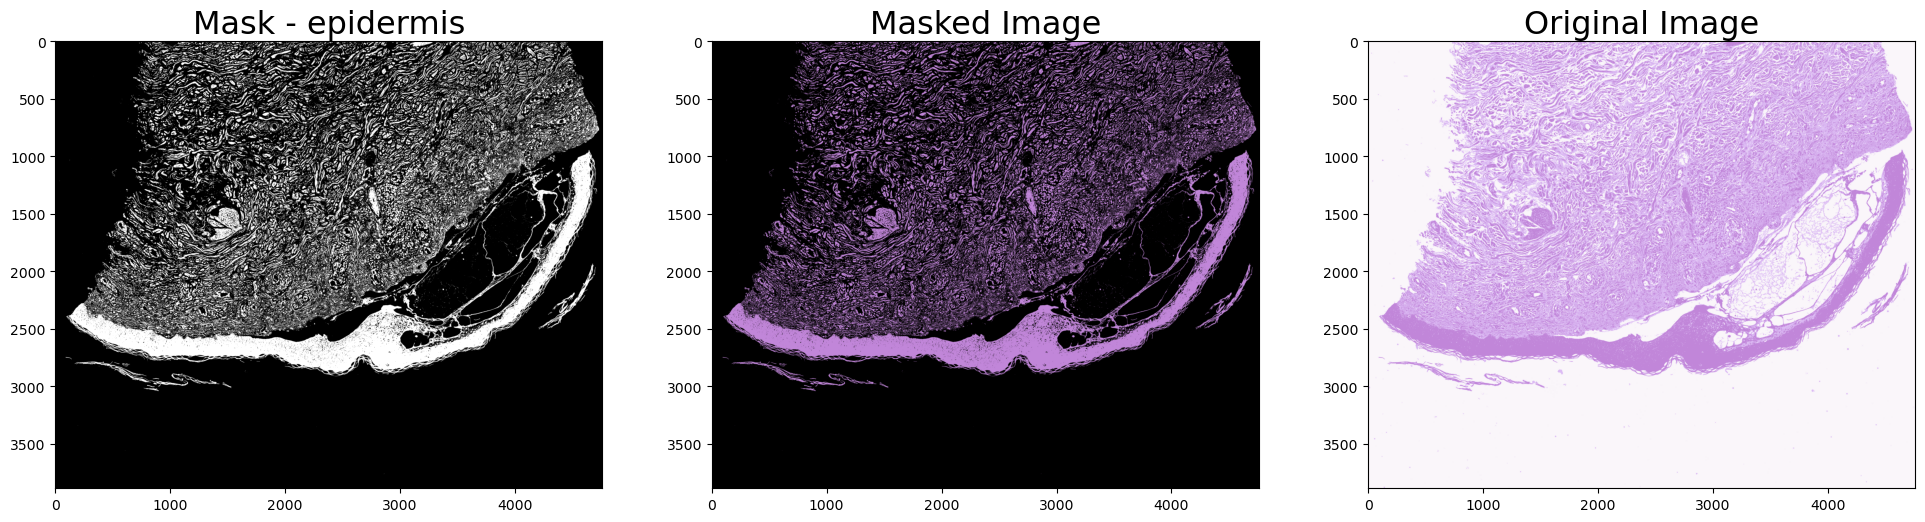

In [13]:
mask_epidermis, result_epidermis = get_mask(rgb_img, hsv_img, split_hsv, mode="epidermis")

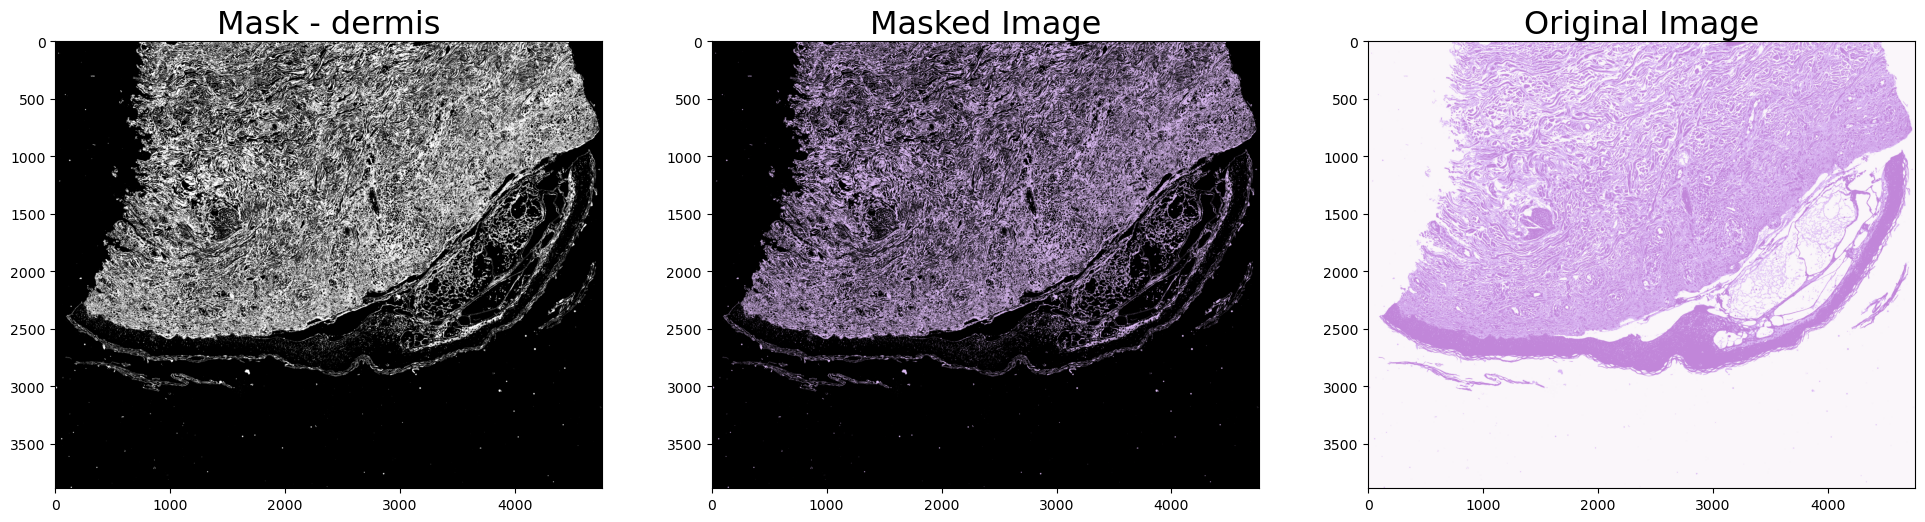

In [14]:
mask_dermis, result_dermis = get_mask(rgb_img, hsv_img, split_hsv, mode="dermis")

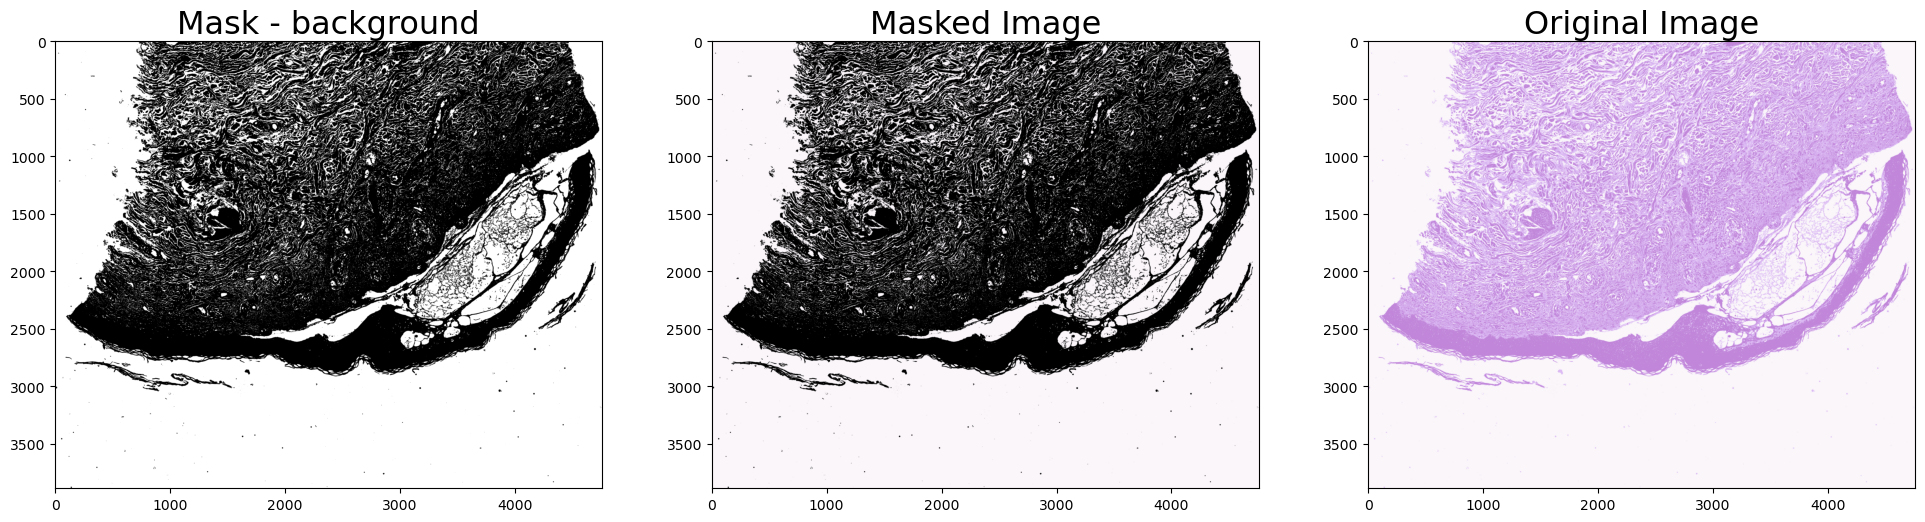

In [15]:
mask_back, result_back = get_mask(rgb_img, hsv_img, split_hsv, mode="background")

## Edge 

Text(0.5, 1.0, 'Background')

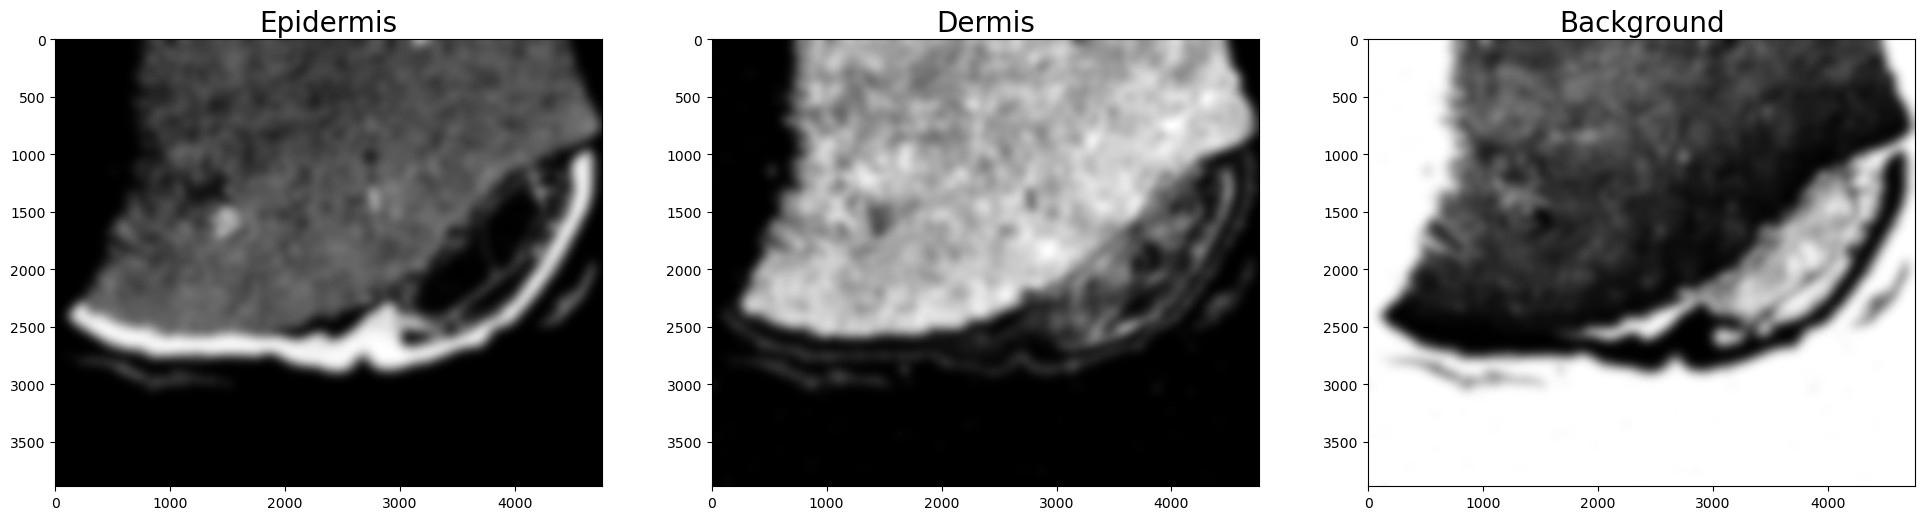

In [22]:
blur_mask_epidermis = cv2.GaussianBlur(mask_epidermis, (301,301), 0)  
blur_mask_dermis = cv2.GaussianBlur(mask_dermis, (301,301), 0)  
blur_mask_back = cv2.GaussianBlur(mask_back, (301,301), 0)  

plt.figure(figsize=(24,8))

plt.subplot(131), plt.imshow(blur_mask_epidermis, cmap='gray')
plt.title('Epidermis', fontsize=20)
    
plt.subplot(132), plt.imshow(blur_mask_dermis, cmap='gray')
plt.title('Dermis', fontsize=20)

plt.subplot(133), plt.imshow(blur_mask_back, cmap='gray')
plt.title('Background', fontsize=20)

Text(0.5, 1.0, 'Background')

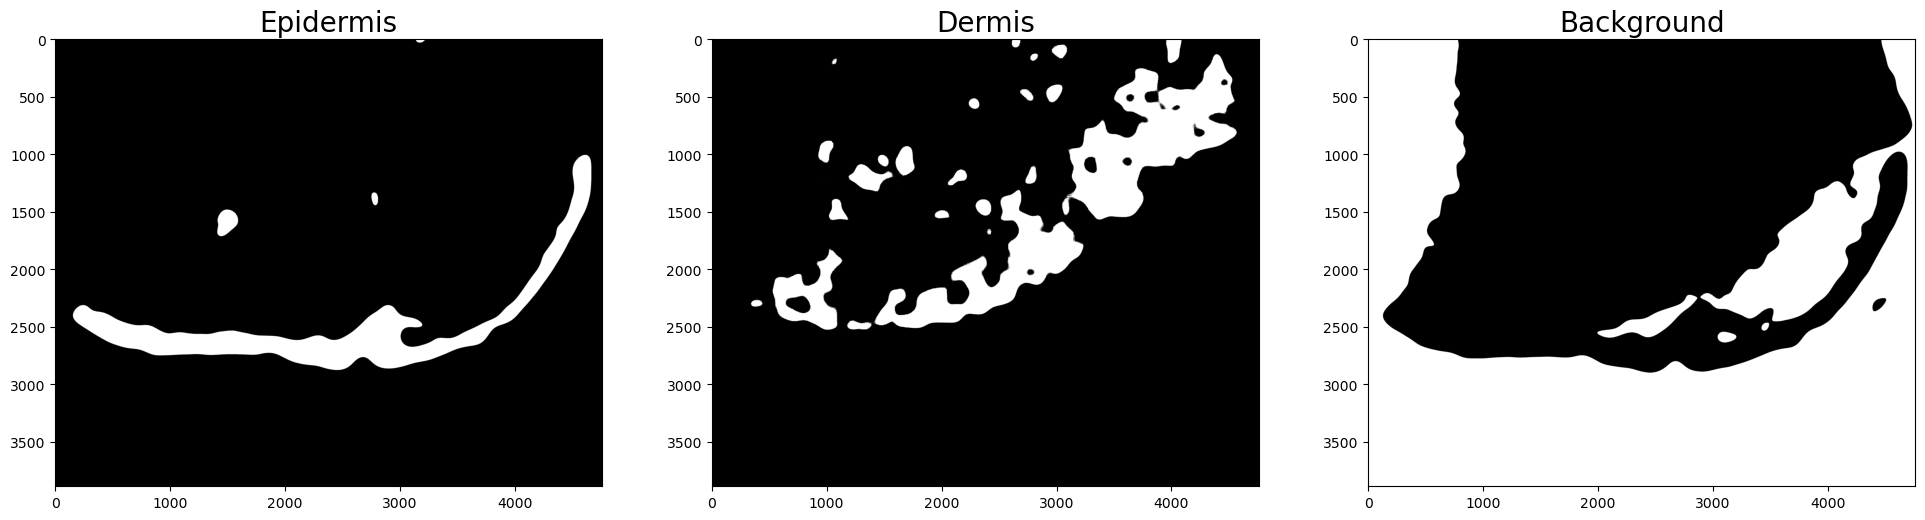

In [23]:
threshold = 140
_, thresholded_epi = cv2.threshold(blur_mask_epidermis, threshold, 255, cv2.THRESH_BINARY)
_, thresholded_der = cv2.threshold(blur_mask_dermis, threshold, 255, cv2.THRESH_BINARY)
_, thresholded_back = cv2.threshold(blur_mask_back, threshold, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(24,8))

plt.subplot(131), plt.imshow(thresholded_epi, cmap='gray')
plt.title('Epidermis', fontsize=20)
    
plt.subplot(132), plt.imshow(thresholded_der, cmap='gray')
plt.title('Dermis', fontsize=20)

plt.subplot(133), plt.imshow(thresholded_back, cmap='gray')
plt.title('Background', fontsize=20)

## Segmentation

In [24]:
def get_segmented_img(rgb_img, thresholded_img, segmen_color):
    origin = rgb_img.copy()
    
    contours, hierarchy = cv2.findContours(thresholded_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for i in range(len(contours)):
        cntr = contours[i]
        cv2.drawContours(origin, [cntr], -1, segmen_color, -1) 
        
    return origin

Text(0.5, 1.0, 'Background')

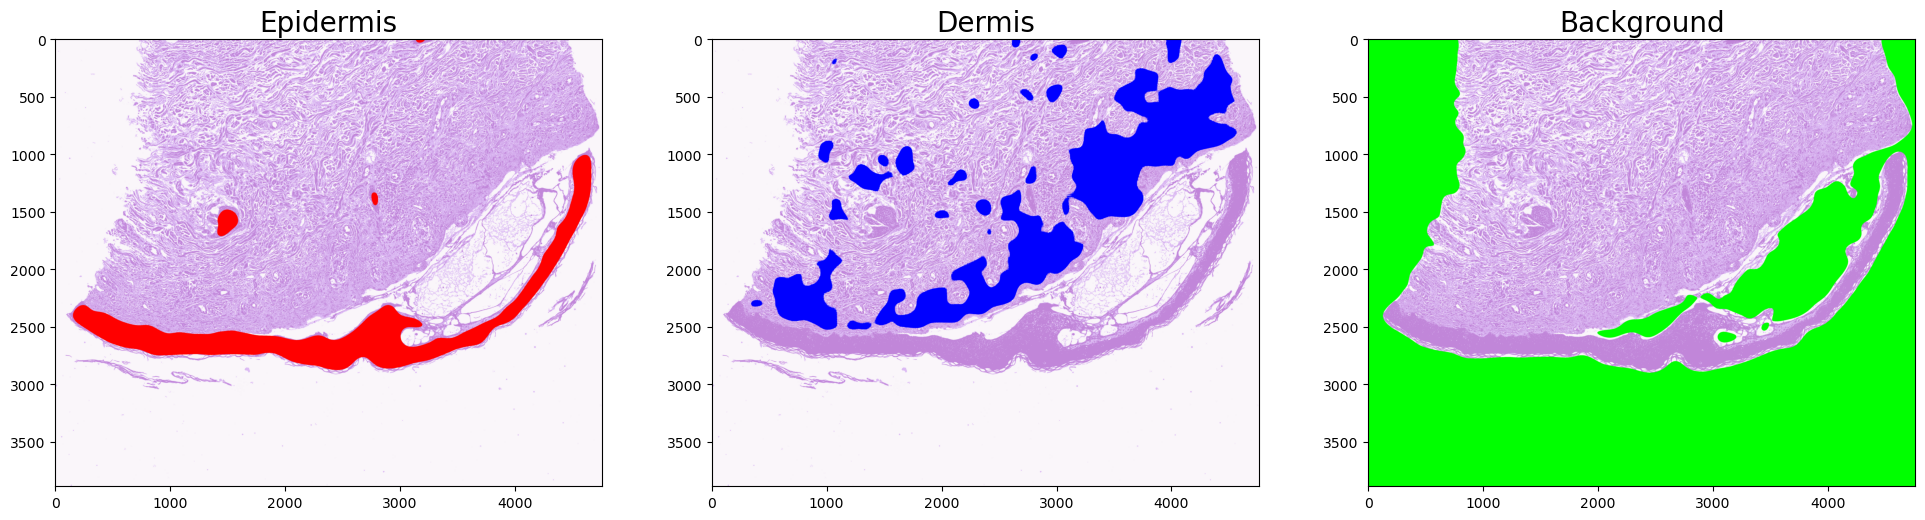

In [25]:
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)

segmented_epi = get_segmented_img(rgb_img, thresholded_epi, segmen_color=red)
segmented_der = get_segmented_img(rgb_img, thresholded_der, segmen_color=blue)
segmented_back = get_segmented_img(rgb_img, thresholded_back, segmen_color=green)

plt.figure(figsize=(24,8))

plt.subplot(131), plt.imshow(segmented_epi)
plt.title('Epidermis', fontsize=20)
    
plt.subplot(132), plt.imshow(segmented_der)
plt.title('Dermis', fontsize=20)

plt.subplot(133), plt.imshow(segmented_back)
plt.title('Background', fontsize=20)

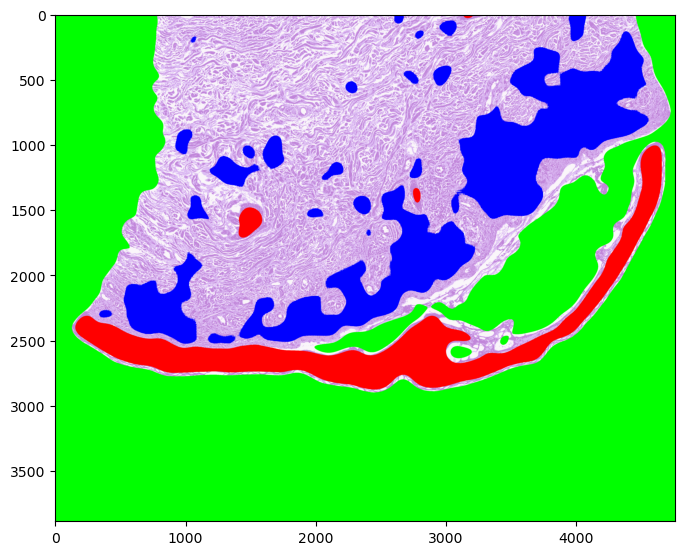

In [26]:
origin = rgb_img.copy()
    
contours_epi, _ = cv2.findContours(thresholded_epi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_der, _ = cv2.findContours(thresholded_der, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_back, _ = cv2.findContours(thresholded_back, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours_epi)):
    cntr_epi = contours_epi[i]
    cv2.drawContours(origin, [cntr_epi], -1, red, -1)  

for i in range(len(contours_der)):
    cntr_der = contours_der[i]
    cv2.drawContours(origin, [cntr_der], -1, blue, -1)
    
for i in range(len(contours_back)):
    cntr_back = contours_back[i]
    cv2.drawContours(origin, [cntr_back], -1, green, -1)

plt.figure(figsize=(8,8))
plt.imshow(origin)
plt.show()

Text(0.5, 1.0, 'Epidermis')

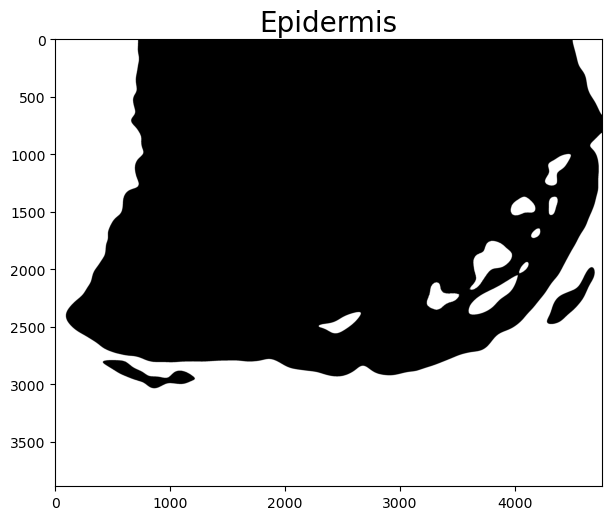

In [69]:
threshold = 200
_, thresholded = cv2.threshold(blur_mask_back, threshold, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(24,8))

plt.subplot(131), plt.imshow(thresholded, cmap='gray')
plt.title('Epidermis', fontsize=20)

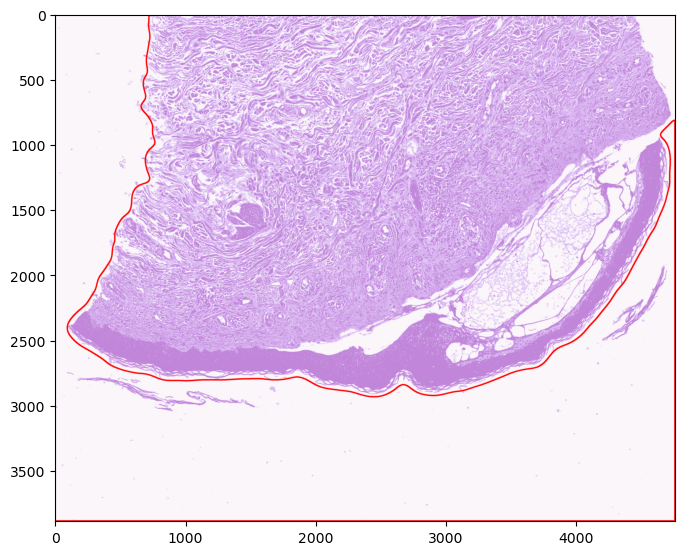

In [80]:
origin = rgb_img.copy()
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_contour = max(contours, key=cv2.contourArea)
    
cv2.drawContours(origin, [max_contour], -1, red, 10)
# for i in range(len(contours)):
#     cntr = contours[i]
#     cv2.drawContours(origin, [cntr], -1, red, 10)

plt.figure(figsize=(8,8))
plt.imshow(origin)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

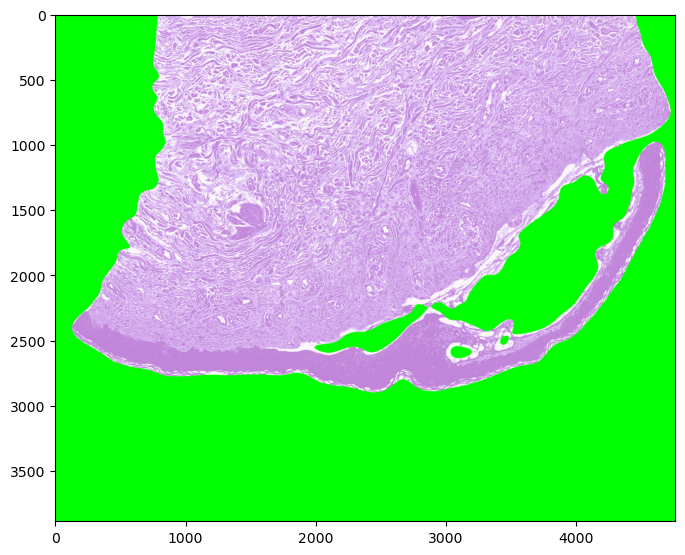

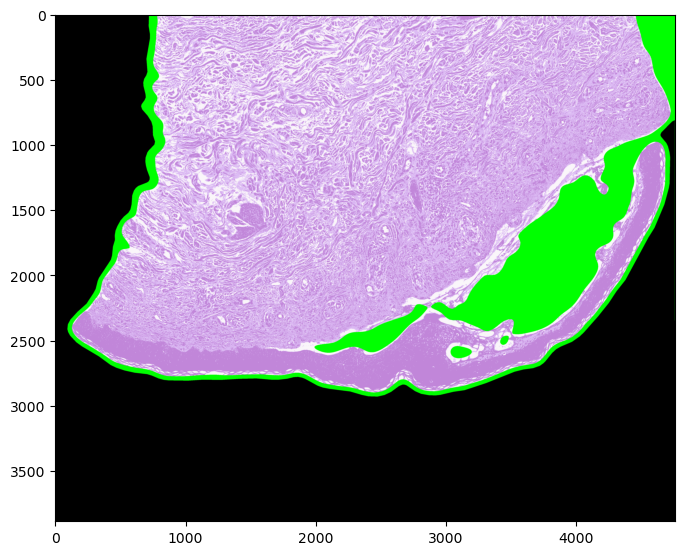

In [90]:
segmented_back = get_segmented_img(rgb_img, thresholded_back, segmen_color=green)

plt.figure(figsize=(8,8))
plt.imshow(segmented_back)
plt.show

contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_contour = max(contours, key=cv2.contourArea)
    
# cv2.drawContours(segmented_back, [max_contour], -1, red, 10)

# plt.figure(figsize=(8,8))
# plt.imshow(segmented_back)
# plt.show()


# 윤곽선을 따라 다각형 근사를 수행합니다.
epsilon = 0.0001 * cv2.arcLength(max_contour, True)
approx = cv2.approxPolyDP(max_contour, epsilon, True)

# 다각형 근사 결과를 기반으로 경계선을 그립니다.
cv2.drawContours(segmented_back, [approx], 0, (0, 255, 0), 2)

gray = cv2.cvtColor(segmented_back, cv2.COLOR_RGB2GRAY)

# 경계선 내부를 채워서 이미지를 자릅니다.
mask = np.zeros_like(gray)
cv2.drawContours(mask, [approx], 0, 255, cv2.FILLED)
cropped_image = cv2.bitwise_and(segmented_back, segmented_back, mask=cv2.bitwise_not(mask))

plt.figure(figsize=(8,8))
plt.imshow(cropped_image)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

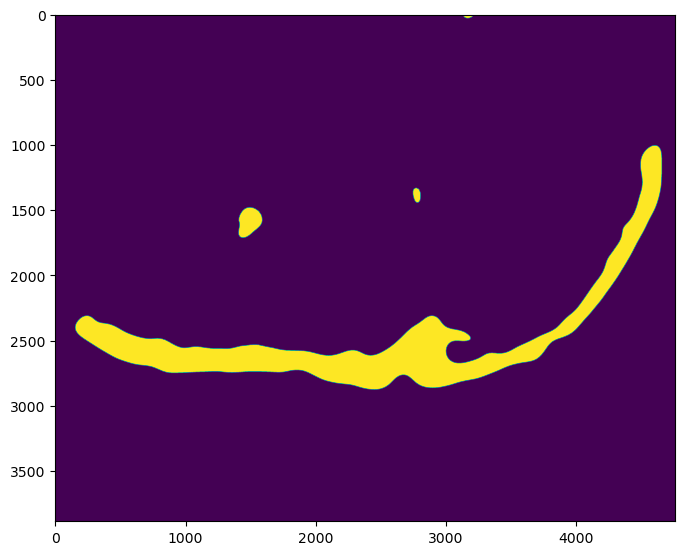

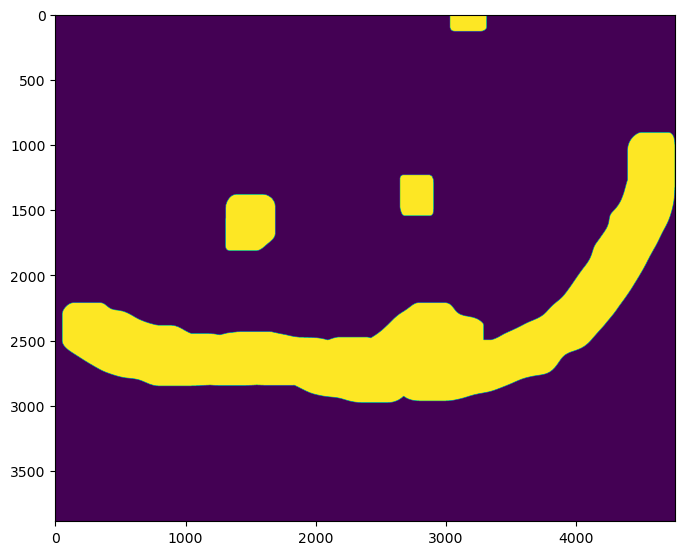

In [97]:
# 팽창 작업 수행

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated_image = cv2.dilate(thresholded_epi, kernel, iterations=50)

plt.figure(figsize=(8,8))
plt.imshow(thresholded_epi)
plt.show

plt.figure(figsize=(8,8))
plt.imshow(dilated_image)
plt.show